matplotlib se donne pour objectif de satisfaire à une large palette de cas d'usages. Elle est capable d'inclure des graphiques dans le user interface toolkit de son choix (lui même choisit pour le développement d'une application) sur l'ensemble des OS majeurs par le support des toolkits GTK+, Qt, Tk, TLTK, wxWidgets et Cocoa (GTK+ était par exemple au lancement du projet, le système de fenêtrage (desktop windowing system) dominant pour Linux). Un autre usage est par exemple l'écriture de scripts dédiés à la production de graphiques sous forme de fichiers PNG, JPG, PDF, etc. à partir des résultats de simulation numérique et ce sans en passer la l'affichage sur un écran. matplotlib peut aussi être utilisée interactivement depuis un REPL Python simple ou associé à un frontend web (ex: notebooks Jupyter/IPython) pour produire des graphiques simples à l'aide de commandes procédurales dans le style MATLAB. C'est pour couvrir la diversité de ces application que matplotlib propose différents backends.

Notion de backend matplotlib 

De façon générale, un backend (qu'on oppose au frontend que constitue le code matplotlib qui fait face à l'utilisateur) matplotlib se charge du calcul effectif du graphique et de le renvoyer sous la forme adaptée à la destination visée (fichier, système de fenêtrage (windowing system), page web, etc.).

On peut déjà tracer une ligne différenciant deux grandes familles de backends: les user interface backends (parfois maladroitement nommés interactive backends) vs hardcopy backends. Les premiers (comme par exemple tkagg, gtkcairo ou encore wxagg) visent entre autre à une interaction avec l'utilisateur via un affichage sur un écran, le plus souvent dans une fenêtre, là où les seconds n'impliquent en général que l'écriture directe d'un graphique dans un fichier  sans en passer par l'affichage à l'écran (pdf, svg, png, etc.). 

Pour les user interface backends, matplotlib distingue les concepts de renderer qui est le code chargé du "calcul" le graphique, et de canvas qu'on peut assimiler au support du graphique affiché (la fenêtre d'un certain système de fenêtrage, la page web, etc.). Les noms de ces backends sont ainsi le plus souvent la contraction du nom du canvas et d'un renderer compatible. On trouve par exemple les backends TkAgg, WXAgg, GTK3Agg ou encore Qt4Agg qui ont en commun le renderer de référence Agg (qui utilise la librairie C++ Anti-Grain Geometry pour construire des images matricielles) et dans le noms desquels on distingue les canvas Tk, wxWidgets, GTK3 et Qt4 respectivement. Un autre renderer connu (vectoriel celui-ci) est Cairo. On le trouve par exemple dans le backend GTK3Cairo.

Remarque : Dans le cas des hardcopy backends, leur nom correspond le plus souvent à celui de leur renderer. Ex: PDF, PS, SVG (les fichiers PNG semblent rendus avec AGG).

On peut ainsi distinguer deux familles de renderers : les renderers vectoriels (Cairo, PDF, PS, SVG) vs les renderers matriciels (Agg, GDK). Les différents backends peuvent ainsi être répartis en 4 familles : suivant s'ils permettent l'interaction avec l'utilisateur (user interface) ou non (hardcopy) et suivant si leur renderer est vectoriel ou matriciel.

On peut également signalier que se distinguent sein des user-interface backends ceux dont le canvas est "statique" et ceux dont il est "dynamiques". Les seconds ne se contentent pas d'afficher statiquement le graphique mais peuvent supporter des widgets permettant d'interagir dynamiquement avec le graphique (zoomer, changer les limites, etc.).

Remarque : Contrairement à ce que l'existence spécifique de hardcopy backends pourrait laisser penser, il n'est pas obligatoire de recourir à ces derniers si on souhaite sauvegarder un graphique dans un format spécifique. Les user-interface backends sont eux aussi capables de sauvegarder des fichiers sous une variété de formats (cf. fig.canvas.get_supported_filetypes()).

Remarque: les installations de matplotlib proposent la plupart du temps un backend par défaut définit dans le matplotlibrc (cf. ```matplotlib.rcParams['backend']```). Pour sélectionner explicitement un backend programmatiquement, utiliser mpl.use(). Ex : mpl.use('tkAgg'), mpl.use('agg') (dans ce second cas on n'utilise que le renderer sans affichage graphique pour n'écrire que des fichiers). Attention : si on envisage d'utiliser l'interface procédurale pyplot, la sélection du backend doit être placée avant l'import de matplotlib.pyplot sous peine de n'avoir aucun effet (cf. plus loin).

La notion d'interactivité dans le contexte de matplotlib 

Le terme "interactif" dans le contexte de la comparaison de backends matplotlib peut désigner différentes réalités qu'il ne faut pas confondre. On en distingue principalement quatre :
* "interactif" dans l'opposition des user-interface backends vs hardcopy backends : contrairement aux seconds, les premiers ont d'interactif avec l'utilisateur le fait que la production du graphique inclut son affichage à l'écran.
* "interactif" dans la capacité que proposent à l'utilisateur certains backends (en fait canvas) de pouvoir modifier dynamiquement le graphique depuis la fenêtre où il a été tracé (zoomer, changer les limites pour s'y déplacer, retirer/ajouter des données, etc.).
* "interactif" au sens que le graphique est retracé à l'exécution de chaque nouvelle commande graphique ce qui peut être particulièrement utile dans une utilisation de matplotlib dans un shell mais qui peut se révéler indésirable dans des contextes où la génération du graphique est très coûteuse. Le concept n'est pertinent que pour l'utilisation des interfaces procédurales pyplot et pylab pour lesquelles et par défaut, chaque nouvelle commande implique le retraçage du graphique. L'utilisation de l'API orienté-objet n'induit pas le rafraichissement du graphique à l'exécution de chaque commande. Le comportement interactif de pyplot se gère indifféremment à l'aide des commandes mpl.interactive(), plt.interactive() ou plt.ion() ou plt.ioff(). En cas de désactivation du mode interactif, le graphique n'est rafraichit à l'écran que par appel explicite d'une méthode draw() ou show().
* "interactif" au sens où l'affichage du graphique à l'écran (éventuellement dans une fenêtre) n'empêche pas la saisie de nouvelles commandes : rendre la main à l'utilisateur n'impose pas la fin de l'affichage du graphique à l'écran. La plupart des GUI libraries/toolkits exigent le contrôle de la main loop of execution de Python ce qui implique qu'on ne peut plus interagir avec Python (ie lui passerde nouvelles commandes) tant que du code de la librairie s'exécute (tant que la fenêtre pop-up affichant le graphique est ouverte par exemple). Pour contourner cette difficulté et si mpl.is_interactive() est à True, l'interpréteur IPython par exemple est capable de démarrer un nouveau thread pour y exécuter le code de la GUI library/toolkit ce qui lui permet d'utiliser un autre thread pour prendre en charge d'éventuelles nouvelles instructions passées par l'utilisateur.

matplotlib : une architecture en trois couches

Le top-level matplotlib object contenant et gérant l'ensemble des éléments constituant un graphique donné est appelé la Figure. Un des principaux enjeu de l'architecture de matplotlib est d'implémenter un framework dans lequel les logiques dédiées à la manipulation de la Figure et à l'acte de la rendre sur un backend particulier (user interface window ou hardcopy) sont totalement séparées. Celà permet d'enrichir les logiques incorporées dans les Figures sans complexifier celles dédiées à rendre sur tel ou tel backend.

L'architecture accomplissant ceci se divise en trois couches superposées. Chaque couche sait interagir avec la couche immédiatement inférieure mais toute couche inférieure n'a pas "conscience" des couches situées au-dessus d'elles : les objets de la couche N peuvent contenir des références vers des objets de la couche N-1 mais l'inverse n'est pas vrai. Les trois couches de la plus basse à la plus haute sont généralement désignées sous les noms de backend, artist et scripting.

Backend layer

La couche backend se charge de fournir pour chaque backend supporté, une implémentation de différentes classes abstraites donnant le contrat à remplir pour pouvoir être utilisé par des objets de la couche Artist (notamment la Figure). Chaque backend doit ainsi pour être supporté fournir une implémentation des classes FigureCanvas, Renderer et Event pour ne citer que les principales (on peut également citer FigureManager, GraphicContext, Show et Timer) : 
* FigureCanvas : Cette classe représente le canvas sur lequel la Figure sera rendue. Son rôle est notamment de faire la traduction entre les événements du GUI toolkit utilisé (notamment en ce qui concerne le rendu et les événements) et les abstractions matplotlib correspondantes (Renderer, Event, etc.). Dans le cas des user interface backend, chaque backend fournit en implémentant cette classe les moyens par lesquels un canvas matplotlib est inséré dans la fenêtre du toolkit utilisé (Qt, GTK, Tk, etc.). Par exemple : la classe FigureCanvasQTAgg du module matplotlib.backends.backend_qt4agg hérite de FigureCanvasBase et y ajoute toute la logique nécessaire pour rendre la Figure calculée (abstraction indépendante du backend) sur le toolkit GTK+.
* Renderer : Le Renderer est l'outil qu'on peut imaginer comme le pinceau permettant de dessiner sur le canvas. Cette classe implémente en particulier un ensemble de méthodes draw_* permettant de rendre différentes primitives sur le canvas d'un backend particulier. Le core Renderer implémenté par matplotlib s'appuie sur la librairie C++ Anti-Grain Geometry (AGG) qui est particulièrement performante dans la génération (avec anticrénelage / anti-aliasing) de graphiques matriciels 2D. Le Renderer se charge de toutes les "drawing operations", tout ce qui n'est pas lié au tracé d'éléments géométriques (la couleur, etc.) est géré par l'objet GraphicContext.
* Event : La classe Event permet de faire la correspondance entre les événements gérés par le backend et leurs abstractions matplotlib : par exemple un key-press-event sera géré par la classe matplotlib KeyEvent.

Remarque : La classe FigureManager ne sert qu'en mode pyplot. Elle wrap notamment FigureCanvas et ajoute quelques méthodes spécifiques à la gestion de ce mode. C'est elle qui est notamment chargé de garder la trace de l'état de la figure courante. 

Cette couche permettant d'abstraire les backends permet au programmeur d'écrire par exemple un code gérant des événements à l'aide des objets matplotlib qui sera indépendant du backend (et qui fonctionnera quel que soit le backend supporté).

Artist layer

La couche artist consiste principalement en un ensemble d'objets chacun abstrayant un élément du grahique. Ces objets héritent pour la plupart de la classe matplotlib.artist.Artist. Les objets héritant de Artist se répartissent en deux catégories : 
* Les primitives : une primitive représente un objet élémentaire visible sur le graphique, on peut notamment citer les classe Line2D, Rectangle, Polygon, Circle, Ellipse, Annotation, AxesImage, FigureImage, etc.
* Les conteneurs : ces objets (héritant eux-même d'Artist) abstraient des éléments du graphiques composé de multiples Artist primitifs. On peut notamment citer les classes Figure, XAxis, YAxis, Axes, PolarAxes, Subplot, Ticks, etc. Ces object servent notamment à créer automatiquement à créer les primitives nécessaires à leur propre représentation. Par exemple, un utilisateur instanciant une nouvelle Figure n'a pas à ce préoccuper de l'instanciation des primitives qui serviront à la rendre sur le canvas, l'objet Figure s'en charge. Le conteneur principal mis à par la Figure est l'Axes qui contient l'ensemble des primitives et conteneurs nécessaires à la représentation d'un "graphique" compris comme un jeu de données et un mapping entre ces données et des dimensions visualisables sur un canvas, une Figure pouvant contenir plusieurs Axes.

Remarque : La Figure est à comprendre avant tout comme un conteneur. Elle est le conteneur le plus englobant, ses principaux attributs étant le patch, correspondant au rectangle formant le fond de la fenêtre (l'objet référencé par patch étant d'ailleurs un Artist de type Rectangle) et un ou plusieurs Axes. 

Le couplage entre les couche artist et backend se fait au niveau de la méthode draw que chaque Artist se doit d'implémenter et avec laquelle il va se dessiner sur un canvas. Un Artist n'est pas conscient du backend sur lequel il sera rendu, la méthode draw étant indépendante du backend. Le lien est fait via l'objet Renderer qui est passé à la méthode draw de l'Artist au moment où on lui demande de se dessiner sur le canvas, cet objet Renderer possédant lui même une référence vers l'objet FigureCanvas propre au backend utilisé. C'est l'objet Renderer qui permet de transformer l'abstraction qu'est un objet Artist en couleurs dans un pixel buffer, en chemins dans un fichier SVG ou en tout autre représentation concrète.

Le nom d'Artist a d'ailleurs été choisi pour la classe refactorant des éléments d'un nombre important d'objets de l'Artist layer car toutes ces classes ont de commun qu'elles dessinent (via leur méthode draw) leur propre contenu sur le canvas (le papier) en utilisant un renderer (pinceau) à la manière d'un artiste.

Remarque : On trouve parfois écrit que le canvas contient la Figure. C'est inexact au sens où une Figure ne contient qu'une référence au canvas à laquelle elle a normalement été liée (lorsqu'elle a été passée au constructeur de la classe FigureCanvas du backend utilisé). Il ne faut pas comprendre le canvas (et l'objet FigureCanvas) comme un autre conteneur des éléments de l'image, l'objet FigureCanvas n'étant qu'une abstraction du canvas du backend choisi. Le canvas ne contient pas la Figure mais c'est sur celui-ci que se dessine elle-même la Figure.

Scripting layer

Là où la backend layer se préoccupe de fournir une interface commune à tous les toolkits (qu'ils soient GUI ou hardcopy) et de rendre sur le canvas approprié les primitives et conteneurs de l'artist layer, la scripting layer propose à l'utilisateur une façon simple de travailler avec les deux autres couches. Cette interface qui correspond pour l'essentiel au module matplotlib.pyplot est particulièrement adaptée et pratique pour une utilisation quotidienne ou l'analyse exploratoire dans des notebooks ou un simple shell par exemple. Là où la syntaxe ou l'utilisation pure des deux autres couches pourrait paraître un peu lourde et inadaptée à un usage rapide ou débutant, pyplot fournit une interface plus légère simplifiant les tâches les plus courante au prix d'une versatilité moindre. La construction d'un graphique à l'aide de la scripting layer/pyplot se fait par enchainement de commandes dans un style procédural type MATLAB ce qui la rend particulièrement adaptée à une utilisation dans un shell. L'interface pyplot est aussi dite stateful: c'est le programme (et non l'utilisateur) qui s'occupe de garder trace de l'état de la figure courante entre deux commandes et de lui appliquer les modifications appropriées à chaque nouvelle commande.  

pyplot s'affiche en particulier comme backend agnostique à l'utilisateur. Le chargement du module s'accompagne par exemple de la sélection du backend par défaut (cf. configuration/matplotlibrc). De même la création d'une nouvelle figure à l'aide de pyplot s'occupe de lier la figure au FigureCanvas approprié. Enfin, la commande plt.show() se charge d'appeler la fonction appropriée au backend sélectionné pour afficher le graphique. L'utilisateur n'a pas à ce soucier des aspects relativement plus complexes liés au backend et à l'interaction avec celui-ci, c'est pour celà qu'on trouve souvent dans des codes sinon totalement écrits en orienté-objet les commandes pyplot où sont gérés des aspects là.

Les trois APIs de matplotlib:
matplotlib propose à l'utilisateur trois principales APIs (dont une dépréciée) compatibles entre elles pour l'écriture de code dédié à la production de graphiques:

* pyplot : Ce module (matplotlib.pyplot) fournit une interface procédurale, au style proche de celui de MATLAB au librairies orientées-objet sous-jacentes (constituant les couches artist et backend). On parle également pour pyplot de state-machine interface (ce qui lui permet notamment et comme pylab d'être utilisée dans un REPL) : une state-machine est un système avec un statut global et chaque opération exécutée sur le système change son statut. On dit ainsi que pyplot est stateful dans le sens où pyplot garde entre chaque commande trace du système consistant principalement en la figure courante. Corollaire : si on utilise uniquement pyplot, notre code n'utilise à aucun moment de référence explicite à un objet (on à pas à créer et manipuler des Figure, Axes, etc.), matplotlib.pyplot est à voir comme un collection de commandes et de fonctions permettant d'obtenir un comportement proche de MATLAB. La gestion des parties backend dépendantes est faite par pyplot qui apparait comme backend agnostique à l'utilisateur. En mode interactif (mpl.is_interactive() à True), l'exécution de chaque commande pyplot entraine un rafraichissement de la figure affichée à l'écran (ce qui peut être coûteux).

* pylab : Ce module (matplotlib.pyplab) constitue une API historique important matplotlib et numpy pour créer un environnement proche de MATLAB avec notamment de nombreuses fonctions prenant le même nom que leur alter-ego MATLAB. Historiquement cette API était destinée à rendre la transition d'un utilisateur de MATLAB vers matplotlib la plus facile possible. matplotlib étant désormais largement adopté et le maintien de cette API coûteux, elle est aujourd'hui dépréciée au profit de pyplot. Comme pyplot il s'agit d'une interface procédurale.

Les deux interfaces présentées ci-dessus constituent ce qu'on appelle aussi la scripting layer de l'architecture de matplotlib. On peut les voir comme des interfaces de plus haut niveau par opposition à l'interface orientée-objet. De façon plus générale, il est découragé d'utiliser pyplot (et pylab) pour autre chose que du prototypage d'autant que ces APIs n'enseignent pas la "bonne" façon d'utiliser matplotlib. Pour le développement d'application, l'interface orientée-objet est à privilégier.

Astuce : Dans un notebook afin d'éviter que certaines fonctions/commandes matplotlib retourne une valeur dont la repr va s'afficher dans la sortie de la cellule exécutée (ex: ```<matplotlib.figure.Figure at 0x1dde5be68d0>```), faire suivre la commande ```;```.

* Object-oriented API : Il s'agit de la voie recommandée (pythonic way) pour interagir et surtout véritablement développer avec matplotlib (si on souhaite l'intégrer à des application par exemple). Utiliser matplotlib via cette interface implique de manipuler directement les objets des couches artist et backend. Cette interface est la plus puissante car donnant le plus de flexibilité et de contrôle, mais elle est aussi la plus complexe. pyplot abstayant partie de la complexité de l'interface orienté-objet, cette dernière apparait souvent plus verbeuse que la première. 

Remarques sur l'interface orientée-objet :
* Contrairement aux commandes pyplot, l'update d'éléments d'une figure n'entraine pas son retracé à l'exécution de chaque commande : il faut faire explictiment appel à une méthode draw ou show pour que les modification soient rendues visibles.
* Faire du 100% orienté-objet n'est pas aisé ni forcément souhaitable. Les parties correspondant à l'instanciation du canvas (en amont du code décrivant le graphique) et à l'affichage du graphique à l'écran (en aval) sont en effet backend spécifiques et demandent une bonne compréhension de l'architecture de matplotlib pour être explicitement programmées (le code de ces parties risquant en plus d'être lui aussi back-end spécifique). pyplot présente l'avantage d'abstraire ces parties et de présenter une interface semblant indépendante du backend utilisé. C'est pourquoi même pour du code présenté comme utilisant l'interface orienté-objet, on retrouve des éléments pyplot pour :
    * Créer et récupérer la figure et du même coup instancier le canvas associé au backend sélectionné et lui passer la figure nouvellement créée (plt.figure(), plt.subplots(), etc.).
    * Afficher la figure : plt.show() se charge d'ajouter le canvas à la fenêtre du GUI toolkit utilisé et de démarrer sa main loop (qui ont pour effet d'afficher le graphique à l'écran, le plus souvent dans une fenêtre pop-up).

Exemple : Génération d'un même graphique avec les trois interfaces : 

pyplot
```python
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.random.randn(len(x))

plt.plot(x, y)
plt.title('random numbers')
plt.show()
```

pylab
```python
from pylab import *

x = arange(0, 10, 0.1)
y = randn(len(x))

plot(x, y)
title('random numbers')
show()
```

Orienté-objet (avec le minimum de pyplot)
```python
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.random.randn(len(x))

fig = plt.figure()
ax = fig.add_subplot(111)
l, = plt.plot(x, y) # voir comment le rendre full objet
t = ax.set_title('random numbers')
plt.show()
```
Remarques avancées sur pyplot : 

L'import de pyplot entraine entre autres la sélection d'un backend par défaut si aucun n'a été sélectionné et la définition de 4 variables globales dans le namespace du module matplotlib.pyplot : _backend_mod, new_figure_manager, draw_if_interactive, et _show. Les valeurs assignées à ces variables sont produites par une fonction qui récupère le backend sélectionné (éventuellement celui définit par défaut) et retourne l'objet module correpondant au module du backend sélectionné (_backend_mod) et les fonctions new_figure_manager, draw_if_interactive et show que doit en principe définir le module (variables new_figure_manager, draw_if_interactive, et _show). Chaque backend implémente une fonction new_figure_manager (qui n'est d'ailleurs appelée que par plt.figure()) mais ce n'est pas forcément le cas pour les deux autres, pyplot utilise alors des placeholders qui "ne font rien". Ce mécanisme est en particulier la raison pour laquelle il est nécessaire de sélectionner son backend AVANT d'importer pyplot si on le souhaite différent du backend par défaut car toutes ces opérations ont lieu justement au moment de l'import. Si on change le backend après l'import, les variables présentées ci-dessus ne sont pas mises à jour pour le nouveau backend et l'appel des commandes pyplot continuera de faire appel à l'ancien backend. 

Remarques : 
* La fonction assignée à draw_if_interactive est responsable du rafraichissement du graphique affiché à l'exécution de nombreuses commandes pyplot (corollaire, si l'instruction exécutée n'appelle pas draw_if_interactive, le graphique ne sera pas rafraichit et il revient à l'utilisateur de le faire manuellement) si plt.is_interactive() est à True.
* La fonction assignée à _show est celle finalement appelée lors de l'exécution de plt.show().
* Le rôle de new_figure_manager() est d'instancier les objet Figure, FigureCanvas et FigureManager appropriés et de retourner le manager. C'est sur ce dernier objet que repose le caratère stateful de pyplot.

Utilisation dans les notebooks IPython/Jupyter : des backends spécifiques 

Le kernel IPython a été conçu pour supporter nativement matplotlib. Toutefois, le support complet de matplotlib par IPython exige l'exécution de la magic command %matplotlib dans une cellule et dont l'effet est de préparer (set up) le kernel à travailler avec matplotlib. Cette commande ne réalise toutefois aucun import. L'expression %matplotlib est à faire suivre du nom d'un backend supporté (sinon le backend choisi correspondra au backend par défaut figurant dans le matplotlibrc). Ex : %matplotlib inline

IPython fournit un backend spécifique nommé inline permettant d'afficher le graphique directement intégré au frontend web qu'est un notebook Jupyter et notamment à la suite de la cellule qui l'a généré. matplotlib 1.4 ajoute également aux backends disponibles un backend spécifique pour interagir dynamiquement avec des graphiques intégrés à certains types de frontends web si eux-même le permettent (c'est le cas pour IPython/Jupyter 3.x+). Ce backend s'appelle notebook (anciennement nbAgg). L'idée était de permettre aux utilisateurs de notebooks de pouvoir travailler avec leurs graphiques comme ils avaient pu le faire (zoomer, se déplacer, etc.) quand ceux-ci sont affichés dans des applications Qt ou GTK qui autorisent une telle interaction dynamique.

Les backends inline et notebook sont spécialement conçus pour une utilisation aisée de matplotlib dans des notebooks. Ces backend spécifiques aux notebooks (qui ne sont qu'un frontend web échangeant avec un kernel IPython qui n'est lui même qu'un cas particulier de shell Python) se distinguent des autres sur deux principaux points :
* Dans un shell "normal" et en utilisant un user-interface backend, le graphique s'afficherait à l'exécution de chaque commande graphique dans une fenêtre pop-up. Avec inline ou notebook, le graphique s'affiche directement dans la sortie de la cellule à l'origine du graphique et sans pop-up de fenêtre. 
* Dans un shell "normal" et en utilisant un user-interface backend, il ne serait pas possible à l'utilisateur d'entrer une nouvelle commande tant que la fenêtre pop-up est ouverte. matplotlib ne rend la main à l'utilisateur qu'après que celui-ci a fermé la fenêtre. Ce comportement est absent avec inline (d'autant qu'il n'y a plus de fenêtre pop-up). Pour notebook en revanche il faut interrompre explicitement l'interaction (bouton Pause) pour reprendre la main. 

Backend inline 
Le renderer utilisé est en fait AGG (cf. implémentation de ipykernel.pylab.backend_inline.FigureCanvas) et le backend finalement utilisé est matplotlib.backends.backend_webagg (cf. la méthode _repr_html_ de matplotlib.figure.Figure). Pour afficher le contenu de la Figure dans le notebook, il suffit juste passer la figure à la fonction display de IPython.core.display (cf. la fonction show de ipykernel.pylab.backend_inline). L'objet Figure implémente en effet une méthode spéciale reconnue IPython après passage à display : _repr_html_ qui se charge de produire une représentation en HTML (cf. les "Rich outputs" de Ipython) du graphique et d'appeler les méthodes nécessaires à son affichage sur le frontend IPython. 

Pour le backend inline, le paramètre bbox_inches des figures est fixé à tight et peut être à l'origine de différences mineures d'aspects entre figures affichés et figures sauvegardées à l'aide de la méthode savefig.

Backend notebook
Le backend notebook (anciennement nbagg) semble globalement et comme inline, se baser sur le backend webAgg : sa classe FigureCanvasNbAgg hérite directement de FigureCanvasWebAggCore.

In [24]:
# Example : embedding matplotlib in GTK+ (Matplotlib for Python Developers, p.116)
import gtk
from matplotlib.backends.backend_gtkagg import FigureCanvasGTKAgg
from matplotlib.figure import Figure
import numpy as np

win = gtk.Window() # instantiate the GTK+ window object
win.connect("destroy", gtk.main_quit) # connect the 'destroy' signal to gtk.main_quit function
win.set_default_size(600, 400)
win.set_title("Matplotlib Figure in a GTK+ Window")

# matplotlib code to generate the plot
fig = Figure(figsize=(5, 4), dpi=100)
axe = fig.add_subplot(111)
x = np.arange(0,2*np.pi, .01)
y = np.sin(x**2)*np.exp(-x)
axe.plot(x, y)

# we bind the figure to the FigureCanvasGTKAgg, so that it will be
# drawn using the specific backend graphic functions
canvas = FigureCanvasGTKAgg(fig)
win.add(canvas)
win.show_all() 
gtk.main() # start the GTK+ main loop

ModuleNotFoundError: No module named 'gtk'

Biblio: 
https://matplotlib.org/users/artists.html
https://www.aosabook.org/en/matplotlib.html
https://fr.wikipedia.org/wiki/Syst%C3%A8me_de_fen%C3%AAtrage

Sur le matplotlib pythonic / plusieurs façons de faire la même chose: mentionner les setters/getters vs l'attribute access direct.

https://matplotlib.org/faq/usage_faq.html#what-is-a-backend
http://queirozf.com/entries/matplotlib-pylab-pyplot-etc-what-s-the-different-between-these
https://www.reddit.com/r/IPython/comments/36p360/try_matplotlib_notebook_for_interactive_plots/

https://stackoverflow.com/questions/5030920/interactive-figure-with-oo-matplotlib
Retenir que c'est la fonction show provenant du bon module backend qui est utilisé pour afficher. Faire un exemple pour un backend différent de inline où on va chercher manuellement show.

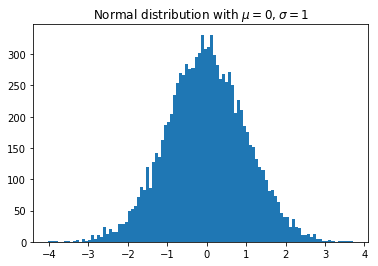

In [1]:
# Avec inline, le renderer est implicitement Agg. FigureCanvas est un alias de FigureCanvasAgg qui est en fait
# le FigureCanvas de matplotlib.backends.backend_agg

from ipykernel.pylab.backend_inline import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np

fig = Figure()
canvas = FigureCanvas(fig)

x = np.random.randn(10000)

ax = fig.add_subplot(111)
ax.hist(x, 100)
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')

# fig.savefig('matplotlib_histogram.png')
# fig.draw() # Necessite qu'on lui passe le renderer explicitement (fig.canvas.get_renderer())
# fig.show() # Figure.show works only for figures managed by pyplot (created by pyplot.figure()).
# fig.canvas.draw()
# Remarque : une figure a une référence à son canvas (un fois les deux liés) : typiquement la raison pour laquelle
# des méthodes telles que savefig semble backend agnostiques ce qui est plus agréable pour l'utilisateur.

from IPython.core.display import display
display(fig)

In [ ]:
import matplotlib as mpl
mpl.use('tkagg')
import matplotlib.pyplot as plt
plt.interactive(True) # commande indispensable si on souhaite que le pop-up de la fenêtre du graphique n'empêche pas
# de passer d'autres commandes au shell IPython

In [ ]:
fig = plt.figure(figsize=(12,6), dpi = 80)
axe = fig.add_subplot(111)

In [ ]:
plt.show()